In [1]:
from halotools.empirical_models import abundance_matching
from halotools import sim_manager
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
#load halo catalogue
default_halocat = sim_manager.CachedHaloCatalog() 
halo_table = default_halocat.halo_table

In [3]:
np.array(halo_table['halo_mvir'])

array([  1.64299998e+14,   1.58899999e+14,   1.14400002e+14, ...,
         4.06199992e+10,   4.06199992e+10,   4.06199992e+10], dtype=float32)

In [4]:
#define schecter function
class Log_Schechter():
    
    def __init__(self, phi0, x0, alpha):
        self.phi0 = phi0
        self.x0 = x0
        self.alpha = alpha
    
    def __call__(self, x):
        x = np.asarray(x)
        x = x.astype(float)
        norm = np.log(10.0)*self.phi0
        val = norm*(10.0**((x-self.x0)*(1.0+self.alpha)))*np.exp(-10.0**(x-self.x0))
        return val

#define galaxy abundance function
dn_gal = Log_Schechter(10**(-3),10.5,-1.4)

#get tabulated form
mstar = np.linspace(8,12,100)
dn = dn_gal(mstar)
mstar = 10**mstar

In [5]:
params = {'n': dn, 'x': mstar, 'type': 'differential'}
ab_func = abundance_matching.AbundanceFunctionFromTabulated(**params)

[ -2.10038522e-01   9.77341290e+00  -3.29122860e+02   5.34307451e+03]
[ 8.          8.04040404  8.08080808  8.12121212] [-1.67095638 -1.68989603 -1.70895363 -1.72813464] slice(None, 4, None)
[-0.47171609  2.10283239]


//anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:604: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
halotools/empirical_models/abundance_matching/abundance.py:239: RuntimeWarning: overflow encountered in exp
  return -1.0*np.exp(a*x+b) + c*x + d


In [6]:
galprop_sample_values = np.logspace(7,12.2,1000)
haloprop_sample_values = np.logspace(11.5,15,1000)

SHAM_model = abundance_matching.AbundanceMatching('mstar', 
                                                  'halo_mvir', 
                                                  ab_func, 
                                                  galprop_sample_values, haloprop_sample_values,
                                                  complete_subhalo_catalog = halo_table, 
                                                  Lbox=250.0, scatter_level=0.0)

[ -1.           0.          -1.326114    12.94632657]
[ 10.60873985  10.60873985  10.60873985  10.60873985] [-1.15973167 -1.15973207 -1.15973247 -1.15973287] slice(None, 4, None)
[-1.  0.]


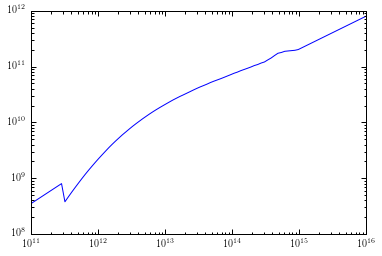

In [7]:
halo_masses = np.logspace(11,16,100)
result = SHAM_model.mean_mstar(prim_haloprop = halo_masses)

plt.figure()
plt.plot(halo_masses,result)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [8]:
#caclulate empirical halo abundnace
cumu_x, x_centers = abundance_matching.empirical_cum_ndensity(halo_table['halo_mvir'],default_halocat.Lbox**3)
result = abundance_matching.AbundanceFunctionFromTabulated(
                            n = cumu_x, 
                            x = x_centers, 
                            type = 'cumulative', 
                            n_increases_with_x = False,
                            num_points_to_fit_low_abundance=10,
                            num_points_to_fit_high_abundance=100)
                      

[ -1.           0.          -1.72504198  18.92996236]
[ 10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.60873985  10.60873985  10.60873985  10.60873985
  10.60873985  10.6087

array([  6.40000000e-08,   1.28000000e-07,   1.92000000e-07, ...,
         6.92257280e-02,   6.92257920e-02,   6.92258560e-02])

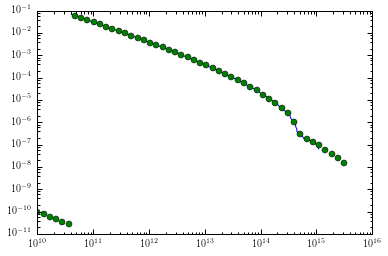

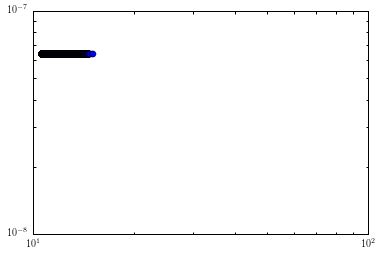

In [15]:
sample = np.logspace(10,15.5,50)

plt.figure()
plt.plot(x_centers,cumu_x,'-')
plt.plot(sample,result.n(sample),'o')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.figure()
plt.plot(result._x[1:],result._dn[1:],'o')
plt.yscale('log')
plt.xscale('log')
plt.show()